In [1]:
import pandas as pd
import requests


/tmp/ipykernel_9320/2558438626.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data preparation

### Listings

In [2]:
listings = pd.read_csv('../data - AirBnb/listings.csv')
listings = listings[["latitude", "longitude", "name", "room_type", "neighbourhood_group", "neighbourhood",
    "price", "minimum_nights", "number_of_reviews", "reviews_per_month",
    "availability_365"]]

In [3]:
# berlin_coords = [52.51687767752022, 13.389323026028334]

# m = leafmap.Map()
# m = leafmap.Map(center=berlin_coords, zoom = 11)
# m.add_geojson("../data - AirBnb/neighbourhoods.geojson", layer_name="Neighbourhoods")
# df2 = listings[:1000]
# for _, row in df2.iterrows():
#     m.add_marker([row['latitude'], row['longitude']], radius=1)
# m

### Points of interest

In [4]:
def fetch_data_from_link(link):
    try:
        response = requests.get(link)
        if response.status_code == 200:
            json_data = response.json()
            statistics = json_data.get('statistics', {})
            foursquare_stats = statistics.get('Foursquare', {})

            return (
                foursquare_stats.get('checkinsCount', None),
                foursquare_stats.get('usersCount', None),
                foursquare_stats.get('tipCount', None),
                foursquare_stats.get('likes', None),
                json_data.get('numReviews', None)
            )
        else:
            return (f"Error: {response.status_code}",) 
    except requests.exceptions.RequestException as e:
        return (f"Error: {e}",)

poi = pd.read_csv("../data - Tourpedia/berlin-poi.csv", index_col='id')
poi = poi[poi['type'] == 'poi']
poi = poi[1:5500]
poi = poi[["lat", "lng", "name", "category", "link1"]]
poi[['checkinsCount', 'usersCount', 'tipCount', 'likes', 'numReviews']] = poi['link1'].apply(fetch_data_from_link).apply(pd.Series)
poi = poi.drop(columns=['link1'])
poi = poi.fillna(0)
poi.head()


,lat,lng,name,category,checkinsCount,usersCount,tipCount,likes,numReviews
id,,,,,,,,,
92206,52.514967298868,13.38924407959,Friedrichstraße,Road,1632.0,811.0,5.0,6.0,5.0
92217,52.51717407176,13.396604061127,Kronprinzenpalais,Monument / Landmark,43.0,35.0,0.0,1.0,0.0
92219,52.534030062626,13.418166500438,Wasserturm,Monument / Landmark,576.0,297.0,5.0,13.0,5.0
92225,52.518487500219,13.395652887479,Palais am Festungsgraben,Monument / Landmark,217.0,124.0,1.0,0.0,1.0
92227,52.540293319482,13.212606513532,Zitadelle Spandau,Monument / Landmark,1568.0,1231.0,11.0,17.0,10.0


### Restaurants

In [5]:
rst = pd.read_csv("../data - Tourpedia/berlin-restaurant.csv", index_col='id')
rst = rst[rst['category'] == 'restaurant']
rst = rst[1:4500]
rst = rst[["lat", "lng", "name", "subCategory", "details"]]
rst[['checkinsCount', 'usersCount', 'tipCount', 'likes', 'numReviews']] = rst['details'].apply(fetch_data_from_link).apply(pd.Series)
rst = rst.drop(columns=['details'])
rst = rst.fillna(0)
rst.head()

,lat,lng,name,subCategory,checkinsCount,usersCount,tipCount,likes,numReviews
id,,,,,,,,,
91920,52.506011569827,13.32805032307,Hotel Savoy Berlin,Hotel,735.0,283.0,6.0,4.0,6.0
91947,52.511193329824,13.449347019196,Upstalsboom Hotel,Hotel,744.0,170.0,6.0,0.0,6.0
91956,52.500142117474,13.319578369231,Hotel Bleibtreu,Hotel,216.0,112.0,5.0,2.0,5.0
92003,52.502707245292,13.331705331802,Hotel Concorde Berlin,Hotel,2681.0,1155.0,30.0,95.0,30.0
92007,52.504889734436,13.385203007038,relexa hotel Stuttgarter Hof,Hotel,413.0,205.0,3.0,5.0,3.0


### Accomodation

In [6]:
acc = pd.read_csv("../data - Tourpedia/berlin-accommodation.csv", index_col='id')
acc = acc[acc['category'] == 'accommodation']
acc = acc[["lat", "lng", "name", "subCategory", "details"]]
acc[['checkinsCount', 'usersCount', 'tipCount', 'likes', 'numReviews']] = acc['details'].apply(fetch_data_from_link).apply(pd.Series)
acc = acc.drop(columns=['details'])
acc = acc.fillna(0)
acc.head()

,lat,lng,name,subCategory,checkinsCount,usersCount,tipCount,likes,numReviews
id,,,,,,,,,
91904,52.530068167132,13.388135746622,Hotel Zarenhof Berlin-Mitte,Hotel,141,69.0,1.0,0.0,1.0
91921,52.501832343626,13.347193587317,Best Western Hotel President Berlin,Hotel,531,291.0,10.0,1.0,10.0
91934,52.501500248909,13.277047276497,Motel Avus,Hotel,75.0,48.0,0.0,0.0,0.0
91940,52.507759698801,13.328216718728,Hotel Astoria,Hotel,181,41.0,1.0,2.0,1.0
91942,52.495192803401,13.310279846191,Hotel Wittelsbach,Hotel,113,57.0,2.0,1.0,2.0


### Attractions

In [7]:
att = pd.read_csv("../data - Tourpedia/berlin-attraction.csv", skiprows=3, names = ["address", "category","id", "lat", "lng",
                                                                                    "location", "name", "unq_id", "polarity",
                                                                                    "subCategory", "details", "reviews"])
att = att[(att['category'] == 'attraction') & (att['subCategory'] != 'Hotel')]
att = att[1:6500]
att = att[["lat", "lng", "name", "subCategory", "details"]]
att[['checkinsCount', 'usersCount', 'tipCount', 'likes', 'numReviews']] = att['details'].apply(fetch_data_from_link).apply(pd.Series)
att = att.drop(columns=['details'])
att = att.fillna(0)
att.head()

,lat,lng,name,subCategory,checkinsCount,usersCount,tipCount,likes,numReviews
1,52.508052842516,13.426333553402,Köpi,Rock Club,183.0,97.0,3.0,9.0,3.0
4,52.541703653439,13.421982957295,Cocktail Bar X,Cocktail Bar,211.0,139.0,3.0,4.0,3.0
5,52.487675,13.351513,Pinguin Club,Bar,41.0,33.0,1.0,2.0,1.0
6,52.504698864794,13.324902694366,Gainsbourg,Bar,361.0,203.0,8.0,6.0,8.0
7,52.486752629238,13.378601074219,Golgatha,Beer Garden,1022.0,718.0,14.0,18.0,14.0


### Public transport

In [55]:
stops = pd.read_csv("../GTFS/stops.txt")
stops = stops[['stop_name', 'stop_lat', 'stop_lon']]

### Aggregating

In [56]:
import geopandas as gpd
from shapely.geometry import Point

neighborhoods_gdf = gpd.read_file('../data - AirBnb/neighbourhoods.geojson')

listings_gdf = gpd.GeoDataFrame(
    listings, 
    geometry=gpd.points_from_xy(listings['longitude'], listings['latitude'])
)

poi_gdf = gpd.GeoDataFrame(
    poi, 
    geometry=gpd.points_from_xy(poi['lng'], poi['lat'])
)

att_gdf = gpd.GeoDataFrame(
    att, 
    geometry=gpd.points_from_xy(att['lng'], att['lat'])
)

stops_gdf = gpd.GeoDataFrame(
    stops, 
    geometry=gpd.points_from_xy(stops['stop_lon'], stops['stop_lat'])
)

merged_listings = gpd.sjoin(listings_gdf, neighborhoods_gdf, op='within')
merged_poi = gpd.sjoin(poi_gdf, neighborhoods_gdf, op='within')
merged_att = gpd.sjoin(att_gdf, neighborhoods_gdf, op='within')
merged_stops = gpd.sjoin(stops_gdf, neighborhoods_gdf, op='within')

agg_listings = merged_listings.groupby('neighbourhood_left').agg({
    'price': 'mean',
    'reviews_per_month': 'mean',  
})
agg_listings = agg_listings.reset_index()
agg_listings = agg_listings.rename(columns={'neighbourhood_left': 'neighbourhood'})

agg_att = merged_att.groupby('neighbourhood').agg({
    'checkinsCount': 'sum',
    'usersCount': 'sum',
    'tipCount': 'sum',
    'likes': 'sum',
    'numReviews': 'sum',
    'neighbourhood': 'size'  
}).rename(columns={'neighbourhood': 'numRestaurants',
                    'checkinsCount': 'checkinsCount_rest',
                    'usersCount': 'usersCount_rest',
                    'tipCount': 'tipCount_rest',
                    'likes': 'likes_rest',
                    'numReviews': 'numReviews_rest'})

merged_poi = merged_poi[~merged_poi['category'].isin(['Road', 'Subway', 'Light Rail', 'Train Station'])]
agg_poi = merged_poi.groupby('neighbourhood').agg({
    'checkinsCount': 'sum',
    'usersCount': 'sum',
    'tipCount': 'sum',
    'likes': 'sum',
    'numReviews': 'sum',
    'neighbourhood': 'size'  
}).rename(columns={'neighbourhood': 'numPOIs',
                    'checkinsCount': 'checkinsCount_poi',
                    'usersCount': 'usersCount_poi',
                    'tipCount': 'tipCount_poi',
                    'likes': 'likes_poi',
                    'numReviews': 'numReviews_poi'})

agg_stops = merged_stops.groupby('neighbourhood').size().reset_index(name='num_stops')

final_df = agg_listings.merge(agg_poi, how='inner', on='neighbourhood').merge(agg_att, how='inner', on='neighbourhood').merge(agg_stops, how='inner', on='neighbourhood')

In [57]:
final_df = final_df.fillna(0)
final_df.head()

,neighbourhood,price,reviews_per_month,checkinsCount_poi,usersCount_poi,tipCount_poi,likes_poi,numReviews_poi,numPOIs,checkinsCount_rest,usersCount_rest,tipCount_rest,likes_rest,numReviews_rest,numRestaurants,num_stops
0,Adlershof,110.270270,0.836667,674.0,173.0,1.0,0.0,1.0,28,1146.0,225.0,16.0,9.0,16.0,36,121
1,Albrechtstr.,91.820000,1.280000,2229.0,202.0,1.0,0.0,1.0,39,4507.0,979.0,22.0,13.0,22.0,64,114
2,Alexanderplatz,149.550069,1.658514,19378.0,7214.0,97.0,77.0,97.0,114,119212.0,60204.0,783.0,1136.0,793.0,94,821
3,Allende-Viertel,44.500000,1.926667,13.0,7.0,0.0,0.0,0.0,4,474.0,116.0,1.0,2.0,1.0,10,15
4,Alt Treptow,137.981481,0.689419,900.0,404.0,5.0,3.0,5.0,35,8614.0,5170.0,75.0,149.0,74.0,41,62


## Is the position or the popularity of Airbnb apartments related to Points of Interest, public transport or other features of the city?

### Random forest features importance

In [58]:
from sklearn.ensemble import RandomForestRegressor

X = final_df.drop(['neighbourhood', 'reviews_per_month', 'price'], axis=1)
y = final_df['reviews_per_month']

rf = RandomForestRegressor()
rf.fit(X, y)

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
print(feature_importances.sort_values('Importance', ascending=False))


               Feature  Importance
9           likes_rest    0.151817
0    checkinsCount_poi    0.137552
7      usersCount_rest    0.136757
6   checkinsCount_rest    0.118865
12           num_stops    0.093505
11      numRestaurants    0.090947
5              numPOIs    0.079851
1       usersCount_poi    0.062421
10     numReviews_rest    0.036154
8        tipCount_rest    0.031190
3            likes_poi    0.024915
4       numReviews_poi    0.021721
2         tipCount_poi    0.014304


### Linear model with recursive features elimination

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  

X = final_df.drop(['neighbourhood', 'reviews_per_month', 'price'], axis=1)
y = final_df['reviews_per_month']

model = LinearRegression()

rfe = RFE(model, n_features_to_select=1)

fit = rfe.fit(X, y)

ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
print(ranking.sort_values('Ranking'))


               Feature  Ranking
2         tipCount_poi        1
4       numReviews_poi        2
8        tipCount_rest        3
10     numReviews_rest        4
3            likes_poi        5
11      numRestaurants        6
5              numPOIs        7
9           likes_rest        8
12           num_stops        9
1       usersCount_poi       10
0    checkinsCount_poi       11
7      usersCount_rest       12
6   checkinsCount_rest       13


### Lasso Regression

In [60]:
from sklearn.linear_model import LassoCV

X = final_df.drop(['reviews_per_month', 'neighbourhood', 'price'], axis=1)
y = final_df['reviews_per_month']

lasso_model = LassoCV()
lasso_model.fit(X, y)

lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
important_features_lasso = lasso_coefs[lasso_coefs['Coefficient'] != 0]

print(important_features_lasso)

              Feature  Coefficient
0   checkinsCount_poi    -0.000006
6  checkinsCount_rest    -0.000002
7     usersCount_rest     0.000015


## How well can good locations for a new Airbnb be predicted?

In [61]:
from sklearn.model_selection import train_test_split

final_df['target_variable'] = final_df['reviews_per_month'] * final_df['price']

X = final_df.drop(['reviews_per_month', 'neighbourhood', 'price'], axis=1)
y = final_df['target_variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12239164)


In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

def plot_and_evaluate_cv(model, X, y, cv=10):
    y_pred_cv = cross_val_predict(model, X, y, cv=cv)

    # Evaluate model performance
    mae_cv = mean_absolute_error(y, y_pred_cv)
    mse_cv = mean_squared_error(y, y_pred_cv)
    rmse_cv = mean_squared_error(y, y_pred_cv, squared=False)
    r2_cv = r2_score(y, y_pred_cv)

    # Scatter plot of actual vs predicted values
    plt.scatter(y, y_pred_cv, alpha=0.5)
    plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='-', linewidth=1)
    plt.title('Actual vs Predicted Values (Cross-Validation)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

    # Print rounded evaluation metrics
    print(f'Mean Absolute Error (CV): {round(mae_cv, 2)}')
    print(f'Mean Squared Error (CV): {round(mse_cv, 2)}')
    print(f'Root Mean Squared Error (CV): {round(rmse_cv, 2)}')
    print(f'R-squared (CV): {round(r2_cv, 2)}')

    # Return rounded evaluation metrics
    return {'mae_cv': round(mae_cv, 2), 'mse_cv': round(mse_cv, 2), 'rmse_cv': round(rmse_cv, 2), 'r2_cv': round(r2_cv, 2)}



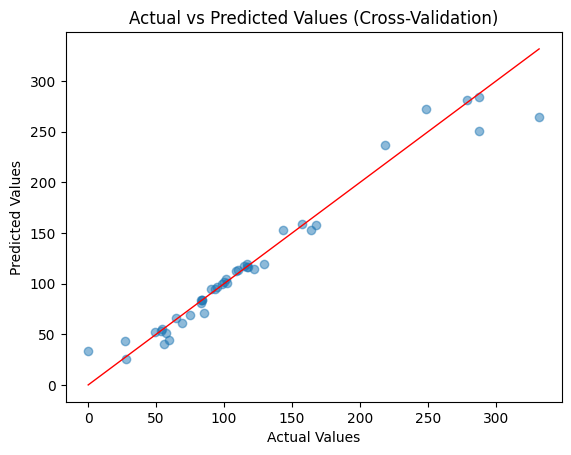

Mean Absolute Error (CV): 8.48
Mean Squared Error (CV): 229.04
Root Mean Squared Error (CV): 15.13
R-squared (CV): 0.96


In [73]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

evaluation_metrics = plot_and_evaluate_cv(rf, X_test, y_test)


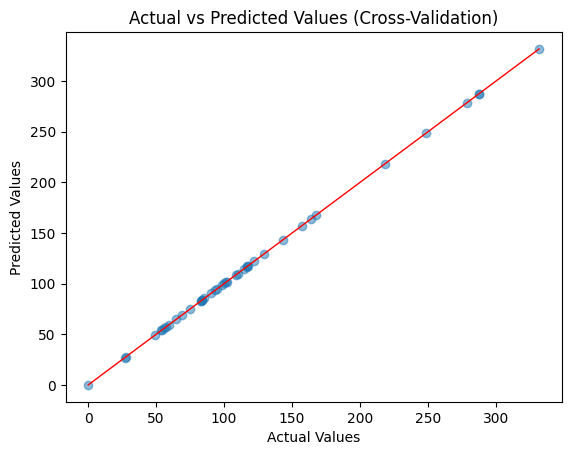

Mean Absolute Error (CV): 0.0
Mean Squared Error (CV): 0.0
Root Mean Squared Error (CV): 0.0
R-squared (CV): 1.0


In [75]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

evaluation_metrics_linear = plot_and_evaluate_cv(lm, X_test, y_test)

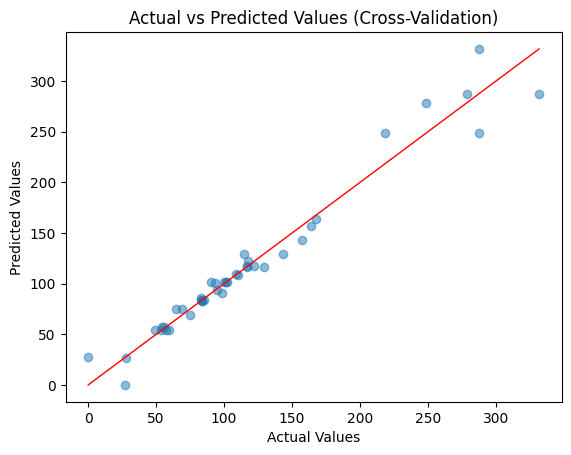

Mean Absolute Error (CV): 9.62
Mean Squared Error (CV): 242.06
Root Mean Squared Error (CV): 15.56
R-squared (CV): 0.96


In [80]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

evaluation_metrics_tree = plot_and_evaluate_cv(tree_model, X_test, y_test)


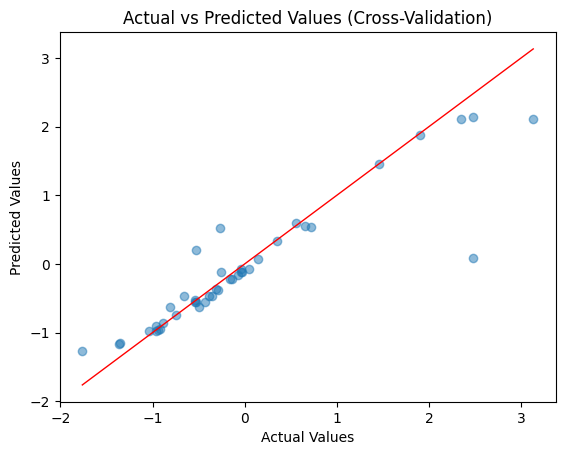

Mean Absolute Error (CV): 0.21
Mean Squared Error (CV): 0.21
Root Mean Squared Error (CV): 0.45
R-squared (CV): 0.83


In [87]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)

# Evaluate and plot using the SVM model
evaluation_metrics_svm = plot_and_evaluate_cv(svm_model, X_test_scaled, y_test)


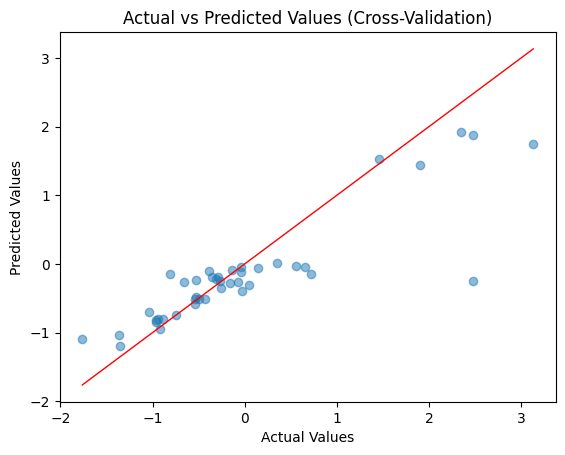

Mean Absolute Error (CV): 0.33
Mean Squared Error (CV): 0.33
Root Mean Squared Error (CV): 0.57
R-squared (CV): 0.73


In [93]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

evaluation_metrics_knn = plot_and_evaluate_cv(knn_model, X_test_scaled, y_test)
